In [92]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.3f}'.format

In [93]:
# 1- read data file
# 1- read processed file
file_dir = '../data/processed-data/'

data_file = 'standardized_normalized_dataset.csv'

data = pd.read_csv(file_dir + data_file)

In [94]:
data.head(5)

,svc_cpu_use,svc_cpu_thr,svc_net_use,svc_disk_use,system_cpu_use,system_cpu_sat,system_net_use,svc_req_size,svc_resp_size,svc_pods,svc_req_rate,ltcy
0,-2.397,-1.146,-2.165,-2.248,-1.571,-1.348,-2.094,-1.754,-1.289,-1.485,-1.998,0.332
1,-2.193,-1.270,-2.052,-2.129,-1.570,-1.347,-2.030,-1.672,-1.230,-1.485,-1.928,0.400
2,-2.221,-1.206,-2.008,-2.227,-1.571,-1.365,-2.023,-1.607,-1.181,-1.485,-1.866,0.469
3,-2.165,-1.270,-2.007,-1.404,-1.571,-1.337,-2.037,-1.624,-1.198,-1.709,-1.872,0.490
4,-2.221,-1.206,-1.955,-1.105,-1.571,-1.321,-2.049,-1.616,-1.192,-2.379,-1.862,0.500


## Function to build a model

In [95]:
# define the model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    # or loss= 'mean_absolute_percentage_error'
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

def medium_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [96]:
targets = data['ltcy']
inputs = data.drop(['ltcy'], axis=1)

x_train, x_test, y_train, y_test = \
    train_test_split(inputs, targets, test_size=0.2, random_state=365)

# for better convergence and result scale target to values between 0 - 1
maxltcy = targets.max()
y_train = y_train / maxltcy
y_test = y_test / maxltcy


In [97]:
estimators = []
##estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=medium_model, epochs=20, batch_size=5, verbose=1, shuffle=False)))
pipeline = Pipeline(estimators)

kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x_train , y_train, cv=kfold)

print ("Done..!")


Epoch 1/20
1140/1140 [==============================] - 4s 4ms/step - loss: 0.1404
Epoch 2/20
1140/1140 [==============================] - 0s 382us/step - loss: 0.0192
Epoch 3/20
1140/1140 [==============================] - 1s 482us/step - loss: 0.0162
Epoch 4/20
1140/1140 [==============================] - 1s 499us/step - loss: 0.0156
Epoch 5/20
1140/1140 [==============================] - 0s 400us/step - loss: 0.0153
Epoch 6/20
1140/1140 [==============================] - 1s 524us/step - loss: 0.0152
Epoch 7/20
1140/1140 [==============================] - 1s 578us/step - loss: 0.0150
Epoch 8/20
1140/1140 [==============================] - 1s 458us/step - loss: 0.0149
Epoch 9/20
1140/1140 [==============================] - 1s 712us/step - loss: 0.0148
Epoch 10/20
1140/1140 [==============================] - 1s 680us/step - loss: 0.0147
Epoch 11/20
1140/1140 [==============================] - 1s 463us/step - loss: 0.0146 0s - lo
Epoch 12/20
1140/1140 [==============================] - 

1140/1140 [==============================] - 0s 397us/step - loss: 0.0143
Epoch 14/20
1140/1140 [==============================] - 0s 391us/step - loss: 0.0143
Epoch 15/20
1140/1140 [==============================] - 0s 391us/step - loss: 0.0142
Epoch 16/20
1140/1140 [==============================] - 0s 398us/step - loss: 0.0142
Epoch 17/20
1140/1140 [==============================] - 0s 393us/step - loss: 0.0141
Epoch 18/20
1140/1140 [==============================] - 0s 393us/step - loss: 0.0141
Epoch 19/20
1140/1140 [==============================] - 0s 425us/step - loss: 0.0141
Epoch 20/20
127/127 [==============================] - 1s 10ms/step
Epoch 1/20
1140/1140 [==============================] - 4s 4ms/step - loss: 0.1558
Epoch 2/20
1140/1140 [==============================] - 1s 514us/step - loss: 0.0202
Epoch 3/20
1140/1140 [==============================] - 0s 427us/step - loss: 0.0161
Epoch 4/20
1140/1140 [==============================] - 1s 588us/step - loss: 0.0155
Epoc

1141/1141 [==============================] - 1s 540us/step - loss: 0.0153
Epoch 6/20
1141/1141 [==============================] - 0s 410us/step - loss: 0.0150 0s - loss: 0.0
Epoch 7/20
1141/1141 [==============================] - 0s 391us/step - loss: 0.0149
Epoch 8/20
1141/1141 [==============================] - 0s 425us/step - loss: 0.0147
Epoch 9/20
1141/1141 [==============================] - 0s 419us/step - loss: 0.0146
Epoch 10/20
1141/1141 [==============================] - 0s 401us/step - loss: 0.0145 0s - loss: 0.0
Epoch 11/20
1141/1141 [==============================] - 0s 412us/step - loss: 0.0144
Epoch 12/20
1141/1141 [==============================] - 0s 397us/step - loss: 0.0143
Epoch 13/20
1141/1141 [==============================] - 1s 464us/step - loss: 0.0143 0s - loss: 0.0
Epoch 14/20
1141/1141 [==============================] - 0s 401us/step - loss: 0.0142
Epoch 15/20
1141/1141 [==============================] - 0s 397us/step - loss: 0.0141
Epoch 16/20
1141/1141 [==

Text(0, 0.5, 'mean_squared_error')

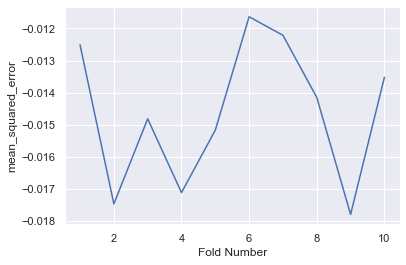

In [98]:
folds = range(1, results.size + 1)

plt.plot( folds , results)
plt.xlabel('Fold Number')
plt.ylabel('mean_squared_error')


In [99]:
regressor = pipeline.named_steps.mlp
print("Model Result (mean and std of error): %.2f (%.2f) MSE" % (results.mean(), results.std()))

Model Result (mean and std of error): -0.01 (0.00) MSE


In [100]:
regressor.fit(x_train, y_train)
y_hat = regressor.predict(x_train)
y_hat = pd.Series(y_hat)
y_hat.head()

Epoch 1/20
1267/1267 [==============================] - 5s 4ms/step - loss: 0.1628
Epoch 2/20
1267/1267 [==============================] - 1s 402us/step - loss: 0.0218
Epoch 3/20
1267/1267 [==============================] - 1s 402us/step - loss: 0.0162
Epoch 4/20
1267/1267 [==============================] - 1s 552us/step - loss: 0.0153
Epoch 5/20
1267/1267 [==============================] - 1s 425us/step - loss: 0.0150
Epoch 6/20
1267/1267 [==============================] - 0s 392us/step - loss: 0.0148
Epoch 7/20
1267/1267 [==============================] - 1s 398us/step - loss: 0.0147
Epoch 8/20
1267/1267 [==============================] - 1s 402us/step - loss: 0.0146
Epoch 9/20
1267/1267 [==============================] - 1s 405us/step - loss: 0.0145
Epoch 10/20
1267/1267 [==============================] - 1s 856us/step - loss: 0.0145
Epoch 11/20
1267/1267 [==============================] - 1s 790us/step - loss: 0.0144
Epoch 12/20
1267/1267 [==============================] - 1s 790us

0   0.618
1   0.486
2   0.451
3   0.661
4   0.687
dtype: float32

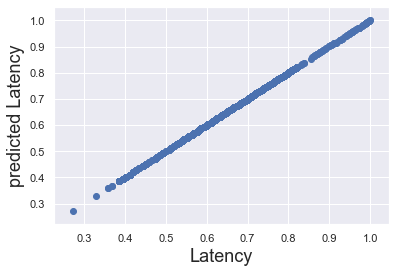

In [101]:
plt.scatter(y_train, y_train)
plt.xlabel('Latency', size=18)
plt.ylabel("predicted Latency", size=18)
#plt.xlim(-2,3)
#plt.ylim(-3,1)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

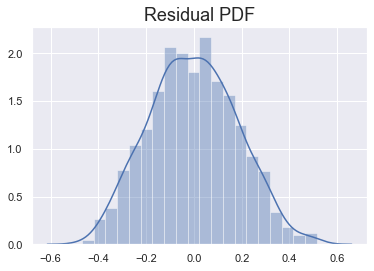

In [102]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [103]:
# evaluation mean_absolute_percentage_error
train_error =  np.abs(y_train - y_hat)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

print("Model Result (mean - std of error - min - max): %.2f (%.2f) %.2f %.2f MSE" \
      % (mean_error, std_error, min_error, max_error))

Model Result (mean - std of error - min - max): 0.15 (0.11) 0.00 0.52 MSE


### Testing

In [104]:
y_hat_test = regressor.predict(x_test)
y_hat_test = pd.Series(y_hat_test)
y_hat_test.head()

317/317 [==============================] - 0s 214us/step


0   0.652
1   0.685
2   0.530
3   0.685
4   0.727
dtype: float32

<function matplotlib.pyplot.show(*args, **kw)>

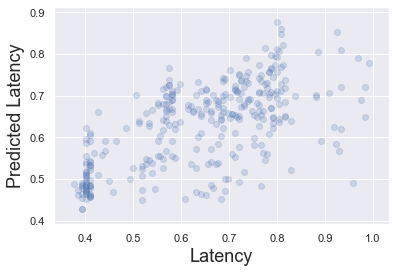

In [105]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Latency', size=18)
plt.ylabel('Predicted Latency', size=18)
plt.show

In [106]:
perf = pd.DataFrame(np.exp(y_hat_test), columns=['prediction'])
y_test = y_test.reset_index(drop=True)
perf['target'] = np.exp(y_test)
perf.head()

,prediction,target
0,1.919,1.767
1,1.985,1.778
2,1.699,1.682
3,1.984,2.266
4,2.070,1.819


In [107]:
# testing mean_absolute_percentage_error
perf['residual'] = perf['prediction'] - perf['target']
perf['difference%'] = np.absolute(perf['residual'] * 100 / perf['target'])
perf

,prediction,target,residual,difference%
0,1.919,1.767,0.152,8.595
1,1.985,1.778,0.207,11.635
2,1.699,1.682,0.017,1.027
3,1.984,2.266,-0.282,12.439
4,2.070,1.819,0.251,13.772
...,...,...,...,...
312,2.178,2.700,-0.522,19.341
313,1.913,2.134,-0.220,10.331
314,2.090,2.266,-0.175,7.738
315,1.890,2.238,-0.347,15.525


In [108]:
perf.describe()

,prediction,target,residual,difference%
count,317.000,317.000,317.000,317.000
mean,1.885,1.921,-0.036,9.056
std,0.188,0.292,0.229,6.737
min,1.535,1.457,-0.975,0.054
25%,1.716,1.704,-0.173,3.782
50%,1.913,1.940,0.006,7.738
75%,2.020,2.143,0.127,13.406
max,2.400,2.700,0.403,37.389


In [109]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
perf.sort_values(by = ['difference%'])

,prediction,target,residual,difference%
278,2.08,2.09,-0.00,0.05
128,1.94,1.94,-0.00,0.06
153,1.71,1.71,-0.00,0.12
105,1.97,1.97,0.00,0.13
264,2.04,2.04,0.00,0.18
126,1.99,1.99,0.00,0.20
154,2.24,2.24,0.00,0.22
146,2.21,2.22,-0.01,0.29
249,2.04,2.04,0.01,0.31
161,1.76,1.77,-0.01,0.34


# Prediction Accuracy

In [110]:
# validation mean_absolute_percentage_error (MAPE)
test_error = np.absolute(perf['residual'] / perf['target'])
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)

print("Mean Absolute Percentate Error std of error (MAPE): [mean: %.2f std: %.2f max: %.2f min: %.2f]" \
      % (mean_error, std_error, max_error, min_error))


Mean Absolute Percentate Error std of error (MAPE): [mean: 0.09 std: 0.07 max: 0.37 min: 0.00]


In [111]:
# validation mean_squared_error  (MSE)
test_error =  np.power(perf['residual'] , 2)
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)

print("Mean Squared Error (MSE): [mean: %.2f std: %.2f max: %.2f min: %.2f]" \
      % (mean_error, std_error, max_error, min_error))


Mean Squared Error (MSE): [mean: 0.05 std: 0.10 max: 0.95 min: 0.00]


R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.

In [112]:
# R-Squared 
# = 1 -  ( sum of squared residual  / sum of squared variance )
# sum of variance squared = sum (( y - y-mean ) ** 2)
# sum of residual squared = sum (( y-hat - y-mean ) ** 2)
# where y is the observed target, y-mean is the mean of observed target, y-hat is a predicted value

y_mean = np.mean(targets)
sum_squared_residual = np.sum(np.power(perf['residual'] , 2))
sum_squared_variance = np.sum(np.power(targets - y_mean , 2))

R_squared = 1 - ( sum_squared_residual / sum_squared_variance )

R_squared


0.7043905449761578